In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import glob
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
train_benign_df = pd.read_csv("./csv_files/train_benign_asmfile.txt")
train_benign_df.drop(train_benign_df.columns[-1], axis=1, inplace=True)
train_benign_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
train_benign_df['label'] = 0

train_malware_df = pd.read_csv("./csv_files/train_malware_asmfile.txt")
train_malware_df.drop(train_malware_df.columns[-1], axis=1, inplace=True)
train_malware_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
train_malware_df['label'] = 1

test_benign_df = pd.read_csv("./csv_files/test_benign_asmfile.txt")
test_benign_df.drop(test_benign_df.columns[-1], axis=1, inplace=True)
test_benign_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
test_benign_df['label'] = 0

test_malware_df = pd.read_csv("./csv_files/test_malware_asmfile.txt")
test_malware_df.drop(test_malware_df.columns[-1], axis=1, inplace=True)
test_malware_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
test_malware_df['label'] = 1

valid_benign = pd.read_csv("./csv_files/valid_benign_asmfile.txt")
valid_benign.drop(valid_benign.columns[-1], axis=1, inplace=True)
valid_benign.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
valid_benign['label'] = 0

valid_malware = pd.read_csv("./csv_files/valid_malware_asmfile.txt")
valid_malware.drop(valid_malware.columns[-1], axis=1, inplace=True)
valid_malware.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
valid_malware['label'] = 1


In [3]:
import sklearn
df_list = [train_benign_df, train_malware_df, test_benign_df, test_malware_df, valid_benign, valid_malware]
full_df = pd.concat(df_list, ignore_index=True, axis=0)
full_shuffled_df = sklearn.utils.shuffle(full_df)
full_shuffled_df

,ID,jmp,mov,retf,push,pop,xor,retn,nop,sub,...,ebx,ecx,edi,ebp,esp,eip,.dll,std::,:dword,label
1058,0aa2d5cf1924aebbe01746a9a8549725,24,273,0,324,78,28,29,1,23,...,0,0,0,0,0,0,0,0,0,1
320,05e8dbde87d89ae84dad0e1c1347c8aa,123,2863,0,1305,574,205,272,18,160,...,0,0,0,0,0,0,0,12,16,0
1294,0b5d10b5a2f7230500ad13235bacee02,33,672,0,145,81,164,79,1,107,...,0,0,0,0,0,0,0,4,5,1
1472,3df174b12eb311cbe27356aa653d5628,871,1539,17,595,19,6,274,1,13,...,0,0,0,0,0,0,83,0,288,1
1709,2a0addad2556da2fa728df473f85641c,24,305,0,222,46,72,31,0,13,...,0,0,0,0,0,0,0,0,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,34fb02a3e5d4420a52a89186f0f28c4e,1227,8181,0,3837,1465,591,787,4,440,...,0,0,0,0,0,0,0,0,0,0
2010,53f1913b8bd00bb67c2c7cee939abd41,1659,21714,0,581,457,226,496,200,1311,...,0,0,0,0,0,0,2,0,180,0
2755,4bb522d48ec637297ddcca4fad311ffd,629,4487,5,2741,1041,546,356,2,321,...,0,0,0,0,0,0,1,0,0,1
2164,71f6e2feb8d116d87fb873429f617b5f,90488,859553,92,387730,4633,4680,3455,2,39716,...,0,0,0,0,0,0,24,0,0,0


In [4]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
NORMALIZE_VALID_COLUMNS = [ 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','lea','movzx','edi','ebp','esp', '.dll', 'std::', ':dword']

# full_shuffled_df[NORMALIZE_VALID_COLUMNS] = scaler.fit_transform(full_shuffled_df[NORMALIZE_VALID_COLUMNS])
full_shuffled_df[NORMALIZE_VALID_COLUMNS].astype('float')
df = full_shuffled_df[NORMALIZE_VALID_COLUMNS]
df

,jmp,mov,retf,push,pop,xor,retn,nop,sub,inc,...,jnb,jz,lea,movzx,edi,ebp,esp,.dll,std::,:dword
1058,24,273,0,324,78,28,29,1,23,26,...,2,24,74,8,0,0,0,0,0,0
320,123,2863,0,1305,574,205,272,18,160,2,...,21,333,405,39,0,0,0,0,12,16
1294,33,672,0,145,81,164,79,1,107,8,...,10,37,16,0,0,0,0,0,4,5
1472,871,1539,17,595,19,6,274,1,13,67,...,0,288,0,0,0,0,0,83,0,288
1709,24,305,0,222,46,72,31,0,13,30,...,4,33,49,10,0,0,0,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,1227,8181,0,3837,1465,591,787,4,440,354,...,152,802,1644,145,0,0,0,0,0,0
2010,1659,21714,0,581,457,226,496,200,1311,0,...,51,1566,695,2829,0,0,0,2,0,180
2755,629,4487,5,2741,1041,546,356,2,321,432,...,75,897,498,169,0,0,0,1,0,0
2164,90488,859553,92,387730,4633,4680,3455,2,39716,1641,...,30186,40170,188786,3,0,0,0,24,0,0


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, full_shuffled_df['label'], stratify=full_shuffled_df['label'], test_size=0.1, random_state=42)

In [6]:
def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [7]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [8]:
data = full_shuffled_df.drop(['ID', 'esi','rtn', 'edx', 'eax', 'ebx', 'ecx', 'eip'], axis=1)
data.head()

,jmp,mov,retf,push,pop,xor,retn,nop,sub,inc,...,jz,lea,movzx,edi,ebp,esp,.dll,std::,:dword,label
1058,24,273,0,324,78,28,29,1,23,26,...,24,74,8,0,0,0,0,0,0,1
320,123,2863,0,1305,574,205,272,18,160,2,...,333,405,39,0,0,0,0,12,16,0
1294,33,672,0,145,81,164,79,1,107,8,...,37,16,0,0,0,0,0,4,5,1
1472,871,1539,17,595,19,6,274,1,13,67,...,288,0,0,0,0,0,83,0,288,1
1709,24,305,0,222,46,72,31,0,13,30,...,33,49,10,0,0,0,0,0,25,1


In [9]:
def kfold(model, train, scale = False):
    cv_accuracy = []
    cv = StratifiedKFold(n_splits=5)
    
    n_iter = 0
    
    for t, v in cv.split(train, train['label']):
        
        train_cv = train.iloc[t] # 훈련용
        val_cv = train.iloc[v] # 검증용 분리

        train_X = train_cv.drop('label', axis=1)
        train_y = train_cv['label']

        val_X = val_cv.drop('label', axis=1)
        val_y = val_cv['label']
            
        model.fit(train_X, train_y)
        score = ACCURACY(val_y, model.predict(val_X))
        
        cv_accuracy.append(score)
        n_iter += 1
    return np.mean(cv_accuracy)

In [10]:
# for LGBM error
import re
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [130]:
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=40, random_state=0, n_jobs=-1),
    GradientBoostingClassifier(),
    XGBClassifier(eval_metric = 'logloss', 
                              max_depth = 5, 
                              min_child_weight = 3, 
                               gamma = 3, 
                               colsample_bytree = 0.5, 
                               n_estimators=700),
    LGBMClassifier(n_estimators=600, max_bin=400, num_leaves=24),
    CatBoostClassifier(silent=True, depth=6, l2_leaf_reg=7, learning_rate=0.1, n_estimators=500),
    ExtraTreesClassifier(max_depth=25, n_estimators=320)
]

print('각 모델마다의 Kfold')
for model in models:
  print(f'{type(model).__name__} score: {kfold(model, data)}')

각 모델마다의 Kfold
KNeighborsClassifier score: 0.8554055180461783
LogisticRegression score: 0.6377914991568405
DecisionTreeClassifier score: 0.8801059239168767
RandomForestClassifier score: 0.9284218490520064
GradientBoostingClassifier score: 0.9015818057078373
XGBClassifier score: 0.9126775283564481
LGBMClassifier score: 0.923771968633184
CatBoostClassifier score: 0.9277069267316829
ExtraTreesClassifier score: 0.9316418848301818


### Model Tuning

성능이 가장 잘 나온 상위 5개만 사용, 0.92로 많이 차이 나지 않는 경우 많이 쓰이는 모델로 사용  
Randomforest, LGBMClassifier, XGBClassifier, CatBoost, ExtraTrees

#### RandomForest

In [145]:
params = { 'n_estimators' : [ 40, 50, 60, 80, 100, 200, 300],
           'max_depth' : [12, 14, 16, 18, 20],
           'min_samples_leaf' : [2, 3],
           'min_samples_split' : [2, 4, 6]
            }

In [13]:
# train = full_shuffled_df.drop(['ID','esi','rtn', 'edx', 'eax', 'ebx', 'ecx', 'eip', 'label'], axis=1)
# target = full_shuffled_df['label']

In [147]:
train = full_shuffled_df.drop(['ID','esi','rtn', 'edx', 'eax', 'ebx', 'ecx', 'eip', 'label'], axis=1)
target = full_shuffled_df['label']

model_RFC = RandomForestClassifier()
grid_cv_RFC = GridSearchCV(model_RFC, param_grid = params, cv=5, n_jobs = -1, scoring='f1_micro')
grid_cv_RFC.fit(train, target)
print('최적 하이퍼 파라미터: ', grid_cv_RFC.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_RFC.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
최고 예측 정확도: 0.9320


#### XGBClassifier

In [12]:
import warnings
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
model_XGB = XGBClassifier(eval_metric='logloss', silent = True)

param_grid={'booster' :['gbtree'],
                 'silent':[True],
                 'max_depth':[5,6,8],
                 'min_child_weight':[1,3,5],
                 'gamma':[0,1,2],
                 'subsample':[0.5, 1],
                 'n_estimators':[100, 500, 1000],
                 'learning_rate':[0.001, 0.05, 0.1],
                 'objective':['binary:logistic'],
                 'random_state':[42]}

grid_cv_XGB=GridSearchCV(model_XGB, param_grid=param_grid, n_jobs=-1, scoring='f1_micro')
grid_cv_XGB.fit(train, target)
print('최적 하이퍼 파라미터: ', grid_cv_XGB.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_XGB.best_score_))

최적 하이퍼 파라미터:  {'booster': 'gbtree', 'colsample_bylevel': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'random_state': 42, 'silent': True}
최고 예측 정확도: 0.9288

#### LGBM

In [24]:
model_LGBM = LGBMClassifier()

gridParams = {
    'learning_rate': [0.0001, 0.005, 0.01],
    'n_estimators': [2, 4, 6, 8],
    'num_leaves': [2, 3, 4, 5], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state': [42],
    'subsample':[0.7, 0.75],
    'reg_alpha':[0.8, 1, 1.2],
    'reg_lambda':[0.8, 1,1.2],
    }

grid_cv_LGBM = GridSearchCV(model_LGBM, param_grid=gridParams , n_jobs=-1, scoring='f1_micro')
grid_cv_LGBM.fit(data, target)
print('최적 하이퍼 파라미터: ', grid_cv_LGBM.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_LGBM.best_score_))

최적 하이퍼 파라미터:  {'boosting_type': 'gbdt', 'learning_rate': 0.0001, 'max_bin': 255, 'n_estimators': 6, 'num_leaves': 2, 'objective': 'binary', 'random_state': 42, 'reg_alpha': 0.8, 'reg_lambda': 0.8, 'subsample': 0.7}
최고 예측 정확도: 1.0000


#### CatBoostClassifier

In [14]:
model_CAT = CatBoostClassifier(silent = True)

grid = {'learning_rate': [0.001, 0.01, 0.1],
        'depth': [2, 4, 6],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_cv_CAT = GridSearchCV(model_CAT, param_grid=grid, cv=3 , n_jobs=-1, scoring='f1_micro')
grid_cv_CAT.fit(data, target)
print('최적 하이퍼 파라미터: ', grid_cv_CAT.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_CAT.best_score_))

최적 하이퍼 파라미터:  {'depth': 2, 'l2_leaf_reg': 1, 'learning_rate': 0.001}
최고 예측 정확도: 1.0000


### ExtraClassifier

In [15]:
model_Extra = ExtraTreesClassifier()

grid_params = {
  'max_leaf_nodes':[2, 3, 4, 5, 6],
  'min_samples_split': [2, 3, 4],
  'random_state':[42],
  'n_estimators': [320, 640],
  'max_depth' : [10, 20, 30]
}

grid_cv_extra = GridSearchCV(model_Extra, param_grid=grid_params , n_jobs=-1, scoring='f1_micro')
grid_cv_extra.fit(data, target)
print('최적 하이퍼 파라미터: ', grid_cv_extra.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_extra.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_split': 2, 'n_estimators': 320, 'random_state': 42}
최고 예측 정확도: 0.9996


### Soft Voting

In [113]:
data = full_shuffled_df.drop(['ID', 'esi','rtn', 'edx', 'eax', 'ebx', 'ecx', 'eip'], axis=1)
data.head()

,jmp,mov,retf,push,pop,xor,retn,nop,sub,inc,...,jz,lea,movzx,edi,ebp,esp,.dll,std::,:dword,label
1725,44,424,0,194,70,33,73,0,27,6,...,34,68,3,0,0,0,1,0,5,1
2618,397,2246,0,2725,497,401,177,0,172,228,...,489,435,73,0,1,0,9,0,1,1
2332,25,281,0,333,83,30,29,0,25,26,...,25,74,8,0,0,0,0,0,0,1
1133,199,1265,9,1126,331,107,142,16,95,283,...,132,161,7,0,0,0,1,0,89,1
2245,1713,31512,93,8348,2258,4668,1052,178,1195,597,...,1239,1617,1260,0,0,0,0,82,1025,1


In [114]:
INCLUDE_LABEL = [  'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword', 'label']
X_train, X_test, y_train, y_test = train_test_split(data,full_shuffled_df['label'], stratify=full_shuffled_df['label'], test_size=0.1, random_state=42)

In [115]:
train = X_train.drop('label', axis=1)
target = X_train['label']
# for LGBM error
data = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
best_model_RF = RandomForestClassifier(max_depth=16, n_estimators=100, random_state=42)
best_model_XGB = XGBClassifier(eval_metric = 'logloss', 
                              booster = 'gbtree',
                              colsample_bylevel=0.9,
                              colsample_bytree=0.8,
                              silent = True, 
                              max_depth = 6, 
                              min_child_weight = 1, 
                               gamma = 0, 
                               n_estimators=50,
                               nthread=4,
                               objective='binary:logistic',
                               random_state=42,
                               learning_rate=0.0001,
                               )
best_model_LGBM = LGBMClassifier(boosting_type='gbdt',learning_rate=0.0001 ,n_estimators=6, max_bin=255, num_leaves=2,objective='binary',random_state=42, reg_alpha=0.8, reg_lambda=0.8, subsample=0.7)
best_model_CAT = CatBoostClassifier(silent=True, depth=2, l2_leaf_reg=1, learning_rate=0.0001)
best_model_EXTRA = ExtraTreesClassifier(max_depth=10, max_leaf_nodes=2, min_samples_split=2, n_estimators=320, random_state=42)

In [116]:
from sklearn.ensemble import VotingClassifier
softVoting_model = VotingClassifier(estimators=[('XGB', best_model_XGB), ('LGBM', best_model_LGBM), ('CAT', best_model_CAT), ('EXTRA', best_model_EXTRA), ('RF', best_model_RF)], voting='soft')
softVoting_model.fit(data, target)

[23:13:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1644955194972/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            colsample_bylevel=0.9,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8,
                                            enable_categorical=False,
                                            eval_metric='logloss', gamma=0,
                                            gpu_id=None, importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.0001,
                                            max_delta_step=None, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            m...ne_constraints=None,
                                            n_estimators=50, n_jobs=None,
                     

In [117]:
X_test = X_test.drop('label', axis=1)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

soft_pred = softVoting_model.predict(X_test)
print(classification_report(y_test, soft_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8889    0.9714    0.9283       140
           1     0.9685    0.8786    0.9213       140

    accuracy                         0.9250       280
   macro avg     0.9287    0.9250    0.9248       280
weighted avg     0.9287    0.9250    0.9248       280



<AxesSubplot:>

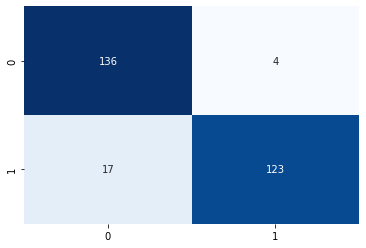

In [119]:
sns.heatmap(confusion_matrix(y_test,soft_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)